# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

SyntaxError: invalid syntax (api_keys.py, line 1)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
city_name = []
country = []
temp = []
humidity = []
lon = []
lat = []
cloudiness = []
wind_speed = []

In [5]:
for city in cities:
    try:
        query_url = url+"appid="+api_key+"&q="+city+"&units="+units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        print(f'Record {cities.index(city)}|{city}')

    except: 
        print("Not Found")


    

Record 0|baruun-urt
Record 1|coquimbo
Record 2|barrow
Record 3|kodiak
Record 4|rio grande
Record 5|champerico
Record 6|upernavik
Record 7|gawler
Record 8|bluff
Record 9|butaritari
Record 10|punta arenas
Record 11|bredasdorp
Record 12|viedma
Record 13|atuona
Record 14|yerbogachen
Record 15|maniitsoq
Record 16|alice springs
Record 17|noormarkku
Record 18|ushuaia
Record 19|esperance
Record 20|chichimila
Record 21|mataura
Record 22|busselton
Record 23|malabo
Record 24|albany
Record 25|atar
Record 26|grass valley
Record 27|fare
Record 28|norman wells
Record 29|loralai
Record 30|rikitea
Record 31|kavieng
Not Found
Record 33|dunedin
Record 34|georgiyevka
Record 35|tahta
Record 36|xining
Record 37|salalah
Record 38|hithadhoo
Record 39|saskylakh
Record 40|road town
Record 41|vagur
Record 42|arraial do cabo
Record 43|chumikan
Record 44|hami
Record 45|moree
Record 46|tasiilaq
Record 47|carnarvon
Record 48|codrington
Record 49|constitucion
Record 50|kavaratti
Record 51|haines junction
Record 52|sh

Record 427|kikwit
Record 428|sedalia
Record 429|yar-sale
Record 430|acapulco
Record 431|byron bay
Record 432|puerto suarez
Record 433|magadan
Record 434|nanortalik
Not Found
Record 436|kuah
Record 437|ibadan
Record 438|vila franca do campo
Record 439|erzin
Record 440|hobyo
Record 441|rameswaram
Record 442|praia da vitoria
Record 443|namwala
Record 444|ovre ardal
Record 445|bafq
Record 446|dutlwe
Not Found
Record 448|pundaguitan
Record 449|cap malheureux
Record 450|sorong
Record 451|alugan
Record 452|pleasanton
Record 453|san cristobal
Record 454|bekhteyevka
Record 455|barcelos
Record 456|veraval
Record 457|port moresby
Record 458|nicoya
Record 459|hargeysa
Record 460|saint-francois
Record 461|narva-joesuu
Record 462|mayor pablo lagerenza
Record 463|muisne
Record 464|maputo
Record 465|kokrek
Record 466|cairns
Record 467|ostroleka
Record 468|pampa
Record 469|takoradi
Record 470|poya
Record 471|pangnirtung
Record 472|tawang
Record 473|thohoyandou
Record 474|vanavara
Record 475|rawlins
Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(len(city_name), len(cloudiness), len(country),len(humidity), len(lon), len(lat), len(temp), len(wind_speed))

545 545 545 545 545 545 545 545


In [7]:
weather_dict = ({"City": city_name, "Cloudiness": cloudiness, "Country": country,                         
                           "Humidity": humidity, "Latitude": lat, "Longitude": lon, "Temperature": temp,
                           "Wind Speed": wind_speed})
weather_df = pd.DataFrame(weather_dict)

In [8]:
weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Baruun-Urt,0,MN,90,46.68,113.28,-3.95,9.62
1,Coquimbo,75,CL,77,-29.95,-71.34,62.60,11.41
2,Barrow,75,US,77,71.29,-156.79,6.80,10.29
3,Kodiak,20,US,59,57.79,-152.41,36.36,13.87
4,Rio Grande,0,BR,57,-32.03,-52.10,75.33,13.87


In [9]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

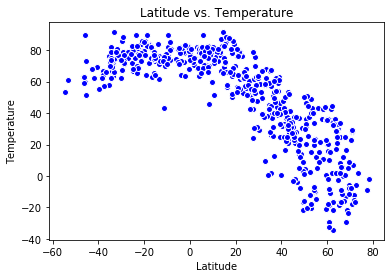

In [23]:

plt.scatter(weather_df["Latitude"],weather_df["Temperature"], marker="o", facecolors="blue", edgecolors="white")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("lat_temp.png")

#### Latitude vs. Humidity Plot

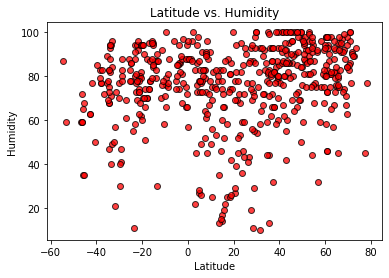

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("lat_humid.png")

#### Latitude vs. Cloudiness Plot

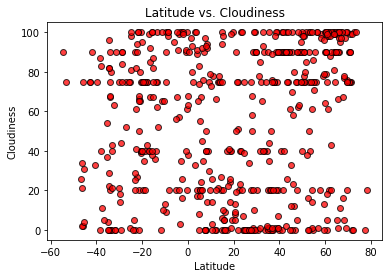

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("lat_cloud.png")

#### Latitude vs. Wind Speed Plot

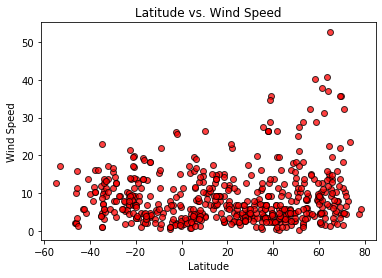

In [15]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("lat_wind.png")